<br>
## <strong>1 금융 시계열 데이터
1. https://github.com/pydata/pandas-datareader
1. ! pip install git+https://github.com/pydata/pandas-datareader.git --upgrade

<br>
### **01 비트코인 금융데이터 수집하기**
from **Pandas** - [CoinMarketCap](https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20180103&end=20180513)

In [6]:
import pandas as pd
prices = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20180103&end=20180530")[0]
prices = prices[::-1]
prices.reset_index(inplace=True, drop=True)
prices.index = pd.DatetimeIndex(prices.Date)
del prices['Date']
prices.columns = [col.replace('*', '')   for col in prices.columns]
prices.head(2)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-01-03,14978.2,15572.8,14844.5,15201.0,16871900000,251312000000
2018-01-04,15270.7,15739.7,14522.2,15599.2,21783200000,256250000000


In [7]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2018-01-03 to 2018-05-30
Data columns (total 6 columns):
Open          148 non-null float64
High          148 non-null float64
Low           148 non-null float64
Close         148 non-null float64
Volume        148 non-null int64
Market Cap    148 non-null int64
dtypes: float64(4), int64(2)
memory usage: 8.1 KB


,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-01-03,14978.2,15572.8,14844.5,15201.0,16871900000,251312000000
2018-01-04,15270.7,15739.7,14522.2,15599.2,21783200000,256250000000
2018-01-05,15477.2,17705.2,15202.8,17429.5,23840900000,259748000000


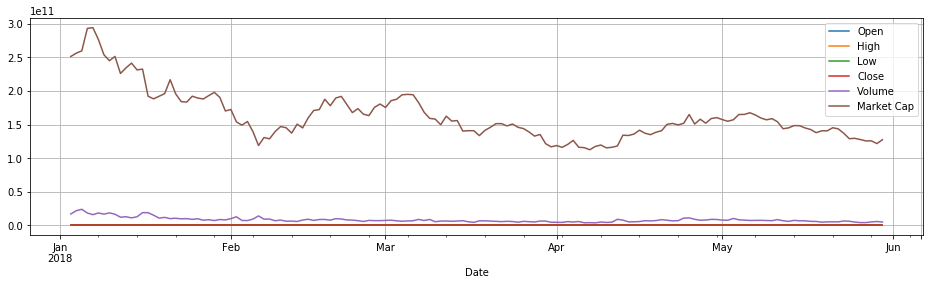

In [9]:
%matplotlib inline
prices.plot(figsize=(16,4), grid=True)
prices.head(3)

<br>
### **02 코스피 실시간 주가정보 수집하기**
from **Pandas** - [Daum 전종목 목록](http://finance.daum.net/quote/all.daum?nil_stock=refresh)

In [20]:
# 코스피 실시간 가격정보 수집하기
# http://finance.daum.net/quote/all.daum?nil_stock=refresh
import pandas as pd
url         = "http://finance.daum.net/quote/all.daum?nil_stock=refresh"
toplist     = pd.read_html(url)
result      = [table          for i, table in enumerate(toplist)   if i >0]
df          = pd.concat(result, axis=0).dropna()
df.columns  = df.iloc[0,:]
df          = df.drop(df.index[0])
df          = pd.concat([df.iloc[:,3:], df.iloc[:,:3]])
df.head()

,종목명,현재가,등락률
2,HDC아이콘트롤스,16150,-3.00%
3,고려개발,7140,-2.72%
4,금호산업우,32700,-6.03%
5,남광토건,23600,-7.09%
6,대림산업우,34500,+0.58%


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 2 to 13
Data columns (total 3 columns):
종목명    884 non-null object
현재가    884 non-null object
등락률    884 non-null object
dtypes: object(3)
memory usage: 27.6+ KB


In [22]:
df = df.reset_index()
df.head()

,index,종목명,현재가,등락률
0,2,HDC아이콘트롤스,16150,-3.00%
1,3,고려개발,7140,-2.72%
2,4,금호산업우,32700,-6.03%
3,5,남광토건,23600,-7.09%
4,6,대림산업우,34500,+0.58%


In [23]:
df = df.drop('index', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
종목명    884 non-null object
현재가    884 non-null object
등락률    884 non-null object
dtypes: object(3)
memory usage: 20.8+ KB


In [24]:
df["현재가"] = df["현재가"].apply(lambda x : int(x))
df["등락률"] = df["등락률"].apply(lambda x : x.replace('%',''))
df["등락률"] = df["등락률"].apply(lambda x : x.replace('+',''))
df["등락률"] = df["등락률"].apply(lambda x : float(x))
df.head(3)

,종목명,현재가,등락률
0,HDC아이콘트롤스,16150,-3.00
1,고려개발,7140,-2.72
2,금호산업우,32700,-6.03


<br>
### **03 종목별 과거 데이터 수집하기**

코스피 실시간 주가정보 수집하기**
from **Pandas** - [NAVER 종목가격 수집](http://finance.naver.com/item/sise_day.nhn?code=005930&page=1")

In [17]:
def get_date_naver(code, page=1):
    import pandas as pd
    print("{} Page {} Day history data".format(page, page*10))
    result = []
    for i in range(1, page+1):
        df = pd.read_html("http://finance.naver.com/item/sise_day.nhn?code=" + code + "&page=" + str(i))[0]
        result.append(df.iloc[1:,:])
    df = pd.concat(result)

    df.columns = ["Date","Close","Change","Price","High","Low","Volume"]
    df.Date    = df["Date"].apply(lambda x : x.replace('.','-'))
    df.Date    = pd.DatetimeIndex(df['Date'])
    for col in df.columns[1:]:
        df[col] = df[col].apply(lambda x : int(x))
    df = df[::-1]
    return df.set_index('Date')

In [19]:
prices_history = get_date_naver('000660',10)
prices_history.tail()

10 Page 100 Day history data


,Close,Change,Price,High,Low,Volume
Date,,,,,,
2018-05-28,94500,700,94600,95600,93700,2505786
2018-05-29,94800,300,94600,96100,93500,2733549
2018-05-30,95000,200,94800,95700,92800,3808299
2018-05-31,93400,1600,94500,94700,92800,5996671
2018-06-01,91400,2000,90800,92200,89600,4781532


In [22]:
prices_history.index

DatetimeIndex(['2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-22',
               '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26',
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-05', '2018-02-06', '2018-02-07',
               '2018-02-08', '2018-02-09', '2018-02-12', '2018-02-13',
               '2018-02-14', '2018-02-19', '2018-02-20', '2018-02-21',
               '2018-02-22', '2018-02-23', '2018-02-26', '2018-02-27',
               '2018-02-28', '2018-03-02', '2018-03-05', '2018-03-06',
               '2018-03-07', '2018-03-08', '2018-03-09', '2018-03-12',
               '2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16',
               '2018-03-19', '2018-03-20', '2018-03-21', '2018-03-22',
               '2018-03-23', '2018-03-26', '2018-03-27', '2018-03-28',
      

In [24]:
prices_history["2018-01":"2018-02"]

,Close,Change,Price,High,Low,Volume
Date,,,,,,
2018-01-05,79300,2200,78400,79400,78300,3395065
2018-01-08,78200,1100,79500,80000,77400,2960495
2018-01-09,76900,1300,78300,78900,76300,3343874
2018-01-10,72900,4000,76700,76700,72500,9123901
2018-01-11,72600,300,73200,73800,72000,3777867
2018-01-12,74400,1800,73300,74500,72000,5659087
2018-01-15,72700,1700,73700,74100,72500,3541267
2018-01-16,74400,1700,72700,74700,72700,4383229
2018-01-17,74100,300,74400,75000,73700,3256624
